In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append('..')
from Sequence import Sequence

from matplotlib.patches import Rectangle
from skimage import io
from utils import get_subwindow, get_scale_subwindow

from fDSSTtracker import DSSTtracker

In [2]:
def conv_to_rect(data, color='r'):
    return Rectangle(
            xy=(data.x, data.y),
            width=data.width,
            height=data.height,
            facecolor='none',
            edgecolor=color,
        )

0


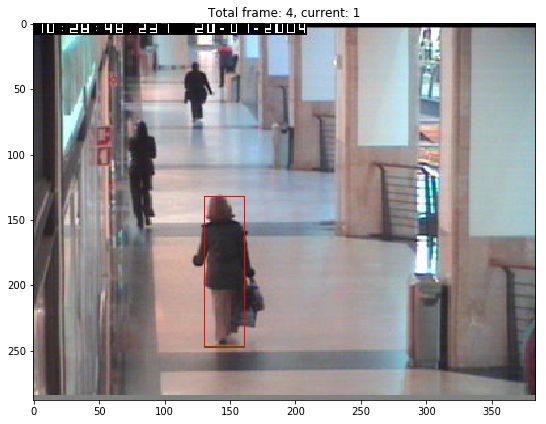

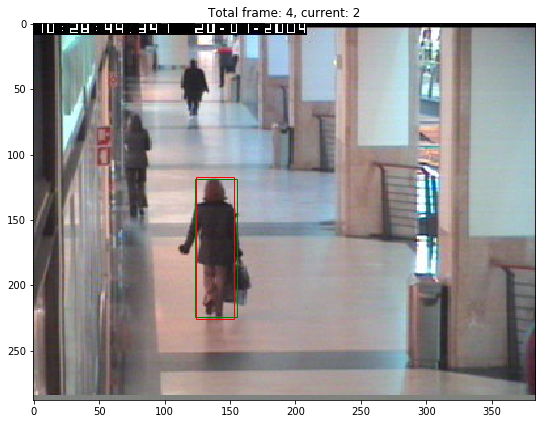

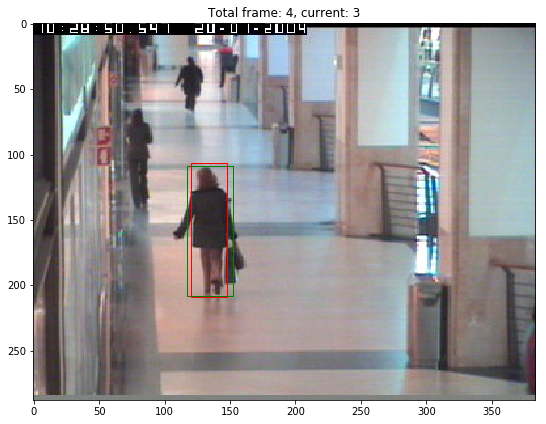

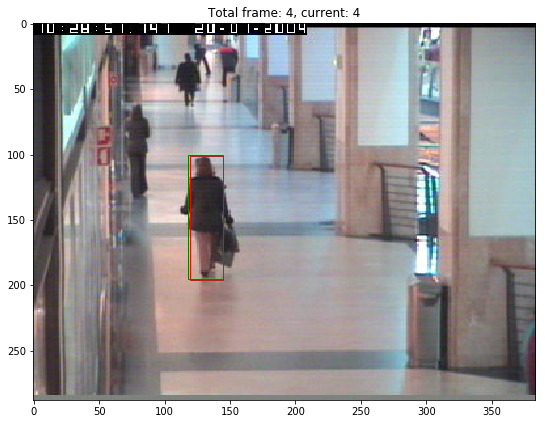

In [3]:
# Visualize Sequence 

# sequence = Sequence(path = os.getcwd(), name='/home/bendafe/data/vot/bmx', 
#                     region_format='rectangle')
sequence = Sequence(path = os.getcwd(), name='tutorials/img_ScaleChange', 
                    region_format='rectangle')

plt.clf()

region = sequence.groundtruth[sequence._frame]
tracker = DSSTtracker(io.imread(sequence.frame()), 
                      region, region.height*region.width*2)

print(sequence._frame)
fig_num = 0
while sequence._frame < len(sequence._images):
    img = io.imread(sequence.frame())
    
    data_gt = sequence.groundtruth[sequence._frame]
    data_tr = tracker.track(img)
    rect_gt = conv_to_rect(data_gt, 'g')
    rect_tr = conv_to_rect(data_tr)
    
    if sequence._frame % 1 == 0:
        plt.figure(figsize=(9, 9))
        ax = plt.subplot(111)
    
        ax.add_patch(rect_gt)
        ax.add_patch(rect_tr)
        plt.imshow(img)
        plt.title('Total frame: %d, current: %d' % (len(sequence._images), 
                                                    sequence._frame+1))
        fig_num += 1
        
    if fig_num >= 20:
        break

    sequence._frame += 1
    
sequence._frame = 0 # after that, we must reset the sequence

In [4]:
from skimage import transform


def get_scale_pyramid(im, pos, base_target_size, scaleFactors, scale_model_sz):
    
    out = []
    plt.clf()
    for i in range(nScales):
        patch_sz = np.floor(base_target_size * scaleFactors[i])
        scale_patch = get_subwindow(im, pos, patch_sz)
        im_patch_resized = transform.resize(scale_patch, scale_model_sz, mode='reflect')
        
        out.append(im_patch_resized*255)
        
    return np.asanyarray(out)

In [35]:
# sequence = Sequence(path = os.getcwd(), name='tutorials/img_ScaleChange', 
#                      region_format='rectangle')

sequence = Sequence(path = os.getcwd(), name='/home/bendafe/data/vot/bmx', 
                    region_format='rectangle')
sequence._frame += 8
image_orig = io.imread(sequence.frame())
region = sequence.groundtruth[sequence._frame]
nScales = 33
scale_step = 1.02

pos = [region.y + region.height / 2, region.x + region.width / 2]
base_target_size = np.array([int(region.height), int(region.width)])
ss = np.arange(nScales) - np.ceil(nScales / 2)
scaleFactors = np.power(scale_step, -ss)

st = get_scale_pyramid(image_orig, pos, base_target_size, scaleFactors, base_target_size)
areas = [32 * 16, 90 * 32, region.width * region.height * 2]
area_colors = ['r', 'y', 'b']
tracker_outputs2 = []
for i in range(len(areas)):
    out_rect = []
    image = image_orig
    tracker = DSSTtracker(image_orig, region, areas[i])
    for j in range(nScales):
        image[int(region.y):region.y + int(region.height), int(region.x):region.x + int(region.width)] = st[j]
        data = tracker.track(image)
        out_rect.append(data)
    tracker_outputs2.append(out_rect)


TypeError: slice indices must be integers or None or have an __index__ method

In [36]:
plt.clf()
for j in range(len(tracker_outputs2[0])):
    image[int(region.y):int(region.y + region.height), int(region.x):int(region.x + region.width)] = st[j]

    plt.figure(figsize=(18, 13))
    ax = plt.subplot(111)
    for i in range(len(areas)):
        ax.add_patch(conv_to_rect(tracker_outputs2[i][j], area_colors[i]))
    plt.imshow(image)
    
# plt.legend()

IndexError: list index out of range

In [19]:
tracker_outputs2

[[Rectangle(x=757.52, y=263.96000000000004, width=123.13999999999999, height=183.51000000000005),
  Rectangle(x=757.2886, y=262.6249, width=125.60279999999999, height=187.18020000000004),
  Rectangle(x=756.032572, y=260.24309800000003, width=128.11485599999997, height=190.92380400000005),
  Rectangle(x=753.71102344, y=258.85405996000003, width=130.67715311999999, height=194.74228008000003),
  Rectangle(x=752.4042519088, y=256.3760331592, width=133.29069618239998, height=198.63712568160005),
  Rectangle(x=752.153777106976, y=253.848445822384, width=135.956510106048, height=202.60986819523205),
  Rectangle(x=749.6901312027155, y=251.2703067388317, width=138.67564030816897, height=206.6620655591367),
  Rectangle(x=748.3033747996338, y=248.6406048736083, width=141.44915311433232, height=210.79530687031942),
  Rectangle(x=745.1231505853721, y=241.61508246832443, width=150.1069728781544, height=223.69766601323798),
  Rectangle(x=746.5947875743736, y=244.41769405100058, width=147.163698900151